In [41]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img,img_to_array
from keras.utils import to_categorical

In [42]:
import keras
from keras_preprocessing.image import ImageDataGenerator
from keras_preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import load_model
from sklearn.metrics import accuracy_score
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

In [44]:
images_csv = pd.read_csv('images.csv')
styles_csv = pd.read_csv('styles.csv', error_bad_lines=False)

In [45]:
for i in styles_csv:
    print(i)

id
gender
masterCategory
subCategory
articleType
baseColour
season
year
usage
productDisplayName
Unnamed: 10
Unnamed: 11


In [46]:
styles_csv[styles_csv['articleType']=='Shirts']

id gender masterCategory subCategory articleType      baseColour  \
0      15970    Men        Apparel     Topwear      Shirts       Navy Blue   
6      30805    Men        Apparel     Topwear      Shirts           Green   
7      26960  Women        Apparel     Topwear      Shirts          Purple   
15     12369    Men        Apparel     Topwear      Shirts          Purple   
30     37812    Men        Apparel     Topwear      Shirts       Navy Blue   
...      ...    ...            ...         ...         ...             ...   
44339  24684    Men        Apparel     Topwear      Shirts       Navy Blue   
44363  23667    Men        Apparel     Topwear      Shirts       Navy Blue   
44368   6005    Men        Apparel     Topwear      Shirts             Red   
44403  23031    Men        Apparel     Topwear      Shirts           White   
44405  51411    Men        Apparel     Topwear      Shirts  Turquoise Blue   

       season    year   usage                              productDisplayName  \
0        Fall  2011.0  Casual                Turtle Check Men Navy Blue Shirt   
6      Summer  2012.0  Ethnic                Fabindia Men Striped Green Shirt   
7      Summer  2012.0  Casual                   Jealous 21 Women Purple Shirt   
15       Fall  2011.0  Formal           Reid & Taylor Men Check Purple Shirts   
30     Summer  2012.0  Formal                John Players Men Navy Blue Shirt   
...       ...     ...     ...                                             ...   
44339    Fall  2011.0  Casual            Highlander Men Navy Blue Check Shirt   
44363    Fall  2011.0  Casual                Spykar Men Navy Blue Check Shirt   
44368  Summer  2011.0  Casual  Highlander Men Red Blue Checked Slim Fit Shirt   
44403    Fall  2012.0  Formal                   Arrow Men White Striped Shirt   
44405  Summer  2012.0  Casual         Myntra Men Turquoise Blue Striped Shirt   

      Unnamed: 10 Unnamed: 11  
0             NaN         NaN  
6             NaN         NaN  
7             NaN         NaN  
15            NaN         NaN  
30            NaN         NaN  
...           ...         ...  
44339         NaN         NaN  
44363         NaN         NaN  
44368         NaN         NaN  
44403         NaN         NaN  
44405         NaN         NaN  

[3215 rows x 12 columns]

In [47]:
articles = ['Shirts', 'Casual Shoes']

In [68]:
articles_dict = {'Shirts': 0, 'Casual Shoes': 1}

In [73]:
articles_dict.keys()

dict_keys(['Shirts', 'Casual Shoes'])

In [48]:
for i in articles:
    print(i)

Shirts
Casual Shoes


In [76]:
if 'Shirts' in articles_dict.keys():
    print("abc")

abc


In [77]:
articles_dict['Shirts']

0

In [179]:
len(images_csv)

44446

In [180]:
# for index, row in styles_csv.iterrows():

In [79]:
X_test1, Y_test1 = [], []
for index, row in styles_csv.iterrows():
    if row['articleType'] in articles_dict.keys():
        Y_test1.append(articles_dict[row['articleType']])
        temp = load_img("./images/{}.jpg".format(row['id']), target_size=(240, 180, 3))
        temp = img_to_array(temp).flatten()
        X_test1.append(temp)

In [80]:
X_test2 = np.array(X_test1, dtype = int)

In [90]:
import pickle

In [91]:
pickle.dump(X_test2, open("./shirt_csshoe.p", 'wb'))

In [92]:
pickle.dump(Y_test1, open("./shirt_csshoe_label.p", 'wb'))

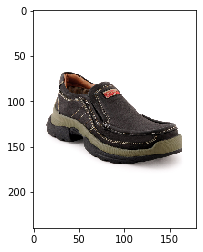

In [81]:
plt.imshow((X_test2[1234].reshape(240, 180,3)))

In [82]:
Y_test1[1234]

1

In [116]:
X_train_fn, X_test_fn, y_train_fn, y_test_fn = train_test_split(X_test2, Y_test1, test_size=0.25, random_state=42)

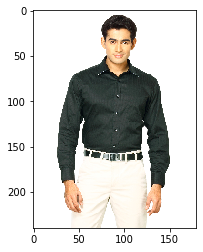

In [138]:
plt.imshow((X_test[9].reshape(240, 180,3)))

In [139]:
y_test[9]

'Shirts'

In [140]:
len(X_train)

2411

In [170]:
np.unique(y_test_new)

array([0])

## MNIST K Means Clustering - Experiment

In [1]:
import sys
import sklearn
import matplotlib
import numpy as np

print('Python: {}'.format(sys.version))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('NumPy: {}'.format(np.__version__))

Python: 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
Sklearn: 0.21.3
Matplotlib: 3.1.1
NumPy: 1.16.5


In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('Training Data: {}'.format(x_train.shape))
print('Training Labels: {}'.format(y_train.shape))

Using TensorFlow backend.


11493376/11490434 [==============================] - 8s 1us/step
Training Data: (60000, 28, 28)
Training Labels: (60000,)


In [3]:
print('Testing Data: {}'.format(x_test.shape))
print('Testing Labels: {}'.format(y_test.shape))

Testing Data: (10000, 28, 28)
Testing Labels: (10000,)


In [4]:
import matplotlib.pyplot as plt

# python magic function
%matplotlib inline

C:\Users\farha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


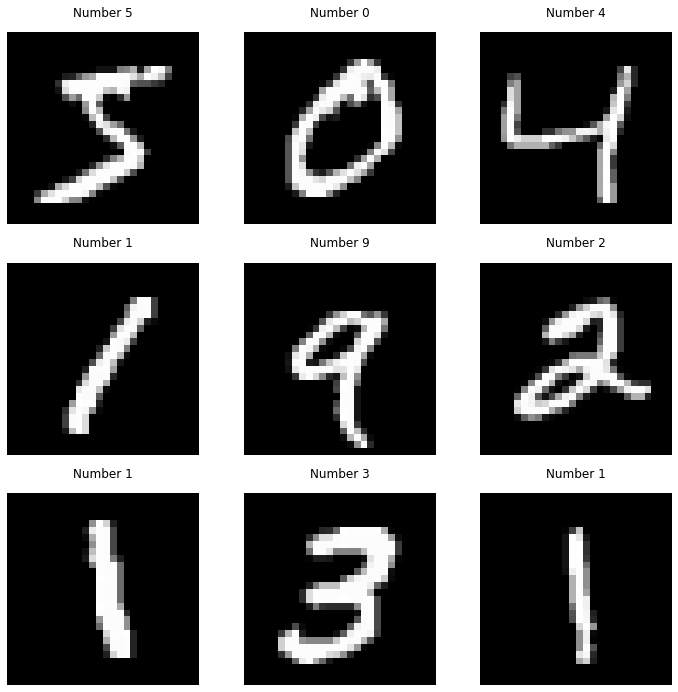

In [5]:
# create figure with 3x3 subplots using matplotlib.pyplot
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))
    
# display the figure
fig.show()

In [6]:
# preprocessing the images

# convert each image to 1 dimensional array
X = x_train.reshape(len(x_train),-1)
Y = y_train

# normalize the data to 0 - 1
X = X.astype(float) / 255.

print(X.shape)
print(X[0].shape)

(60000, 784)
(784,)


In [7]:
from sklearn.cluster import MiniBatchKMeans

n_digits = len(np.unique(y_test))
print(n_digits)

# Initialize KMeans model
kmeans = MiniBatchKMeans(n_clusters = n_digits)

# Fit the model to the training data
kmeans.fit(X)

10


MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=10, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [8]:
kmeans.labels_

array([9, 4, 2, ..., 7, 8, 5])

In [9]:
def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}

    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]

        #print(labels)
        #print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))
        
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

In [14]:
# test the infer_cluster_labels() and infer_data_labels() functions
cluster_labels = infer_cluster_labels(kmeans, Y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[:20])
print(Y[:20])

[3 0 4 1 9 6 1 8 1 7 3 1 3 6 1 7 6 8 1 7]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [15]:
from sklearn import metrics

def calculate_metrics(estimator, data, labels):

    # Calculate and print metrics
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    print('Inertia: {}'.format(estimator.inertia_))
    print('Homogeneity: {}'.format(metrics.homogeneity_score(labels, estimator.labels_)))

In [16]:
clusters = [10, 16, 36, 64, 144, 256]

# test different numbers of clusters
for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters = n_clusters)
    estimator.fit(X)
    
    # print cluster metrics
    calculate_metrics(estimator, X, Y)
    
    # determine predicted labels
    cluster_labels = infer_cluster_labels(estimator, Y)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    
    # calculate and print accuracy
    print('Accuracy: {}\n'.format(metrics.accuracy_score(Y, predicted_Y)))

Number of Clusters: 10
Inertia: 2370308.546131016
Homogeneity: 0.43754268823512726
Accuracy: 0.5192166666666667

Number of Clusters: 16
Inertia: 2204949.5813817363
Homogeneity: 0.5731054539660091
Accuracy: 0.6791166666666667

Number of Clusters: 36
Inertia: 1950995.5038087661
Homogeneity: 0.698757811724193
Accuracy: 0.7833333333333333

Number of Clusters: 64
Inertia: 1811029.1022613465
Homogeneity: 0.7428318710225178
Accuracy: 0.8059333333333333

Number of Clusters: 144
Inertia: 1636932.8061455288
Homogeneity: 0.8069098747535965
Accuracy: 0.86755

Number of Clusters: 256
Inertia: 1511641.0134381098
Homogeneity: 0.8400979029883037
Accuracy: 0.8932333333333333



In [17]:
# test kmeans algorithm on testing dataset
# convert each image to 1 dimensional array
X_test = x_test.reshape(len(x_test),-1)

# normalize the data to 0 - 1
X_test = X_test.astype(float) / 255.

# initialize and fit KMeans algorithm on training data
kmeans = MiniBatchKMeans(n_clusters = 256)
kmeans.fit(X)
cluster_labels = infer_cluster_labels(kmeans, Y)

# predict labels for testing data
test_clusters = kmeans.predict(X_test)
predicted_labels = infer_data_labels(kmeans.predict(X_test), cluster_labels)
    
# calculate and print accuracy
print('Accuracy: {}\n'.format(metrics.accuracy_score(y_test, predicted_labels)))

Accuracy: 0.9009



C:\Users\farha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


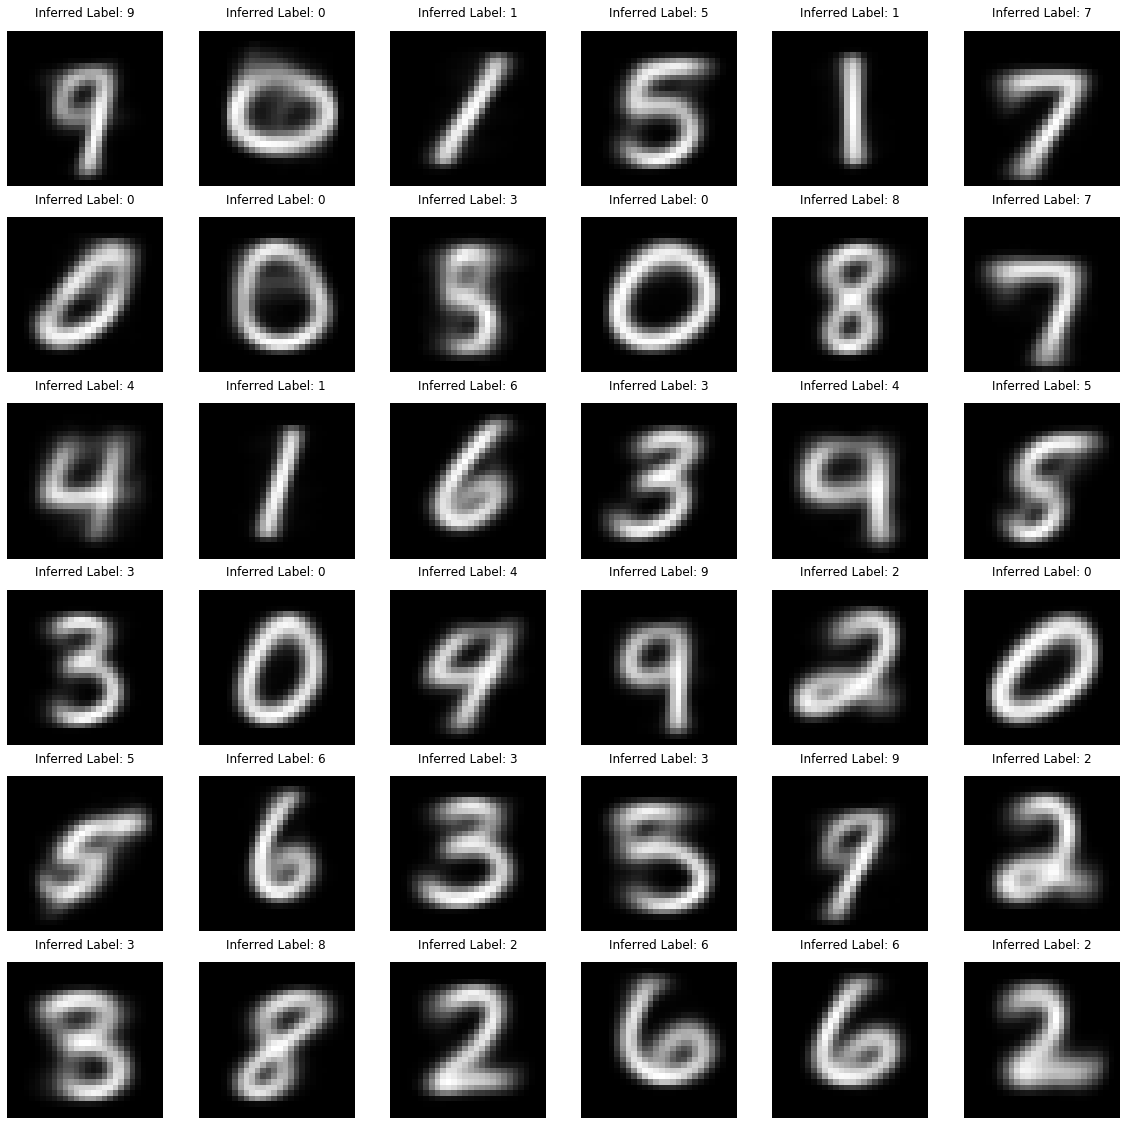

In [18]:
# Initialize and fit KMeans algorithm
kmeans = MiniBatchKMeans(n_clusters = 36)
kmeans.fit(X)

# record centroid values
centroids = kmeans.cluster_centers_

# reshape centroids into images
images = centroids.reshape(36, 28, 28)
images *= 255
images = images.astype(np.uint8)

# determine cluster labels
cluster_labels = infer_cluster_labels(kmeans, Y)

# create figure with subplots using matplotlib.pyplot
fig, axs = plt.subplots(6, 6, figsize = (20, 20))
plt.gray()

# loop through subplots and add centroid images
for i, ax in enumerate(axs.flat):
    
    # determine inferred label using cluster_labels dictionary
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('Inferred Label: {}'.format(key))
    
    # add image to subplot
    ax.matshow(images[i])
    ax.axis('off')
    
# display the figure
fig.show()

## Kmeans Clustering on Shirts and Casual Shoes

In [121]:
y_train_fn = np.array(y_train_fn)
y_test_fn = np.array(y_test_fn)

In [ ]:
# normalize the data to 0 - 1
X_train_fn = X_train_fn.astype(float) / 255.
X_test_fn = X_test_fn.astype(float) / 255.

In [109]:
print('Training Data: {}'.format(X_train_fn.shape))
print('Training Labels: {}'.format(y_train_fn.shape))

Training Data: (4545, 129600)
Training Labels: (4545,)


TypeError: Image data of dtype object cannot be converted to float

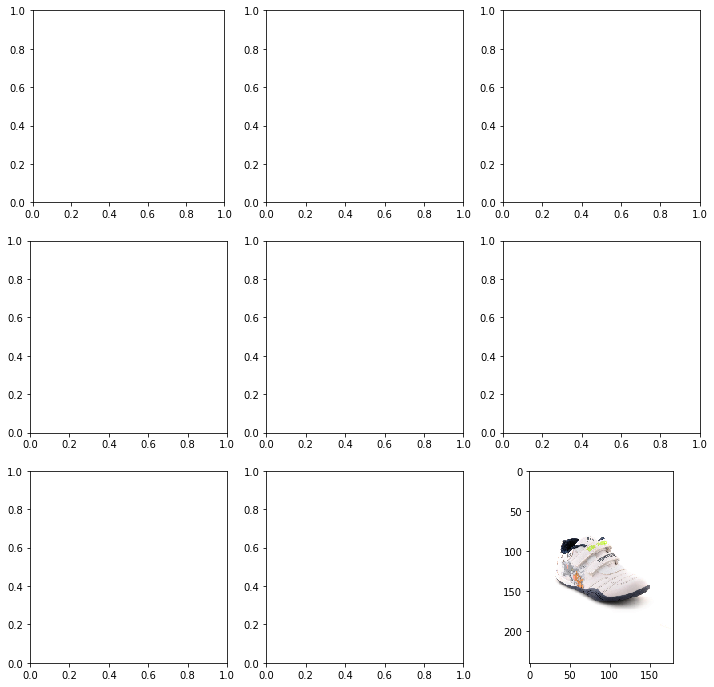

In [110]:
# create figure with 3x3 subplots using matplotlib.pyplot
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
    ax.matshow(plt.imshow((X_train_fn[i].reshape(240, 180,3))))
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train_fn[i]))
    
# display the figure
fig.show()

In [117]:
print(X_train_fn.shape)
print(X_train_fn[0].shape)

(4545, 129600)
(129600,)


In [118]:
# Initialize KMeans model
kmeans = MiniBatchKMeans(n_clusters = 2)

# Fit the model to the training data
kmeans.fit(X_train_fn)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=2, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [119]:
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 1])

In [122]:
# test the infer_cluster_labels() and infer_data_labels() functions
cluster_labels = infer_cluster_labels(kmeans, y_train_fn)
X_clusters = kmeans.predict(X_train_fn)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[:20])
print(np.array(y_train_fn[:20]))

[1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1]
[1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1]


In [123]:
clusters = [2, 4, 16, 32]

# test different numbers of clusters
for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters = n_clusters)
    estimator.fit(X_train_fn)
    
    # print cluster metrics
    calculate_metrics(estimator, X_train_fn, y_train_fn)
    
    # determine predicted labels
    cluster_labels = infer_cluster_labels(estimator, y_train_fn)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    
    # calculate and print accuracy
    print('Accuracy: {}\n'.format(metrics.accuracy_score(y_train_fn, predicted_Y)))

Number of Clusters: 2
Inertia: 21609313.27403056
Homogeneity: 0.8344353487482182
Accuracy: 0.9707370737073707

Number of Clusters: 4
Inertia: 17807818.82901644
Homogeneity: 0.854553311385639
Accuracy: 0.9678767876787678

Number of Clusters: 16
Inertia: 14411180.092205092
Homogeneity: 0.8862573092945767
Accuracy: 0.9658965896589659

Number of Clusters: 32
Inertia: 14072605.555030521
Homogeneity: 0.9117458636658017
Accuracy: 0.9735973597359736



In [124]:
# initialize and fit KMeans algorithm on training data
kmeans = MiniBatchKMeans(n_clusters = 2)
kmeans.fit(X_train_fn)
cluster_labels = infer_cluster_labels(kmeans, y_train_fn)

# predict labels for testing data
test_clusters = kmeans.predict(X_test_fn)
predicted_labels = infer_data_labels(kmeans.predict(X_test_fn), cluster_labels)
    
# calculate and print accuracy
print('Accuracy: {}\n'.format(metrics.accuracy_score(y_test_fn, predicted_labels)))

Accuracy: 0.47757255936675463

